# Importing necessary libraries

In [1]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn import metrics
import dateutil
from sklearn.model_selection import train_test_split

# models and evaluation
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.stats import reciprocal, uniform

# Importing all the datasets

In [2]:
cbyp_01_12 = pd.read_csv (r'Datasets/17_Crime_by_place_of_occurrence_2001_2012.csv')
cbyp_2013 = pd.read_csv (r'Datasets/17_Crime_by_place_of_occurrence_2013.csv')
cbyp_2014 = pd.read_csv (r'Datasets/17_Crime_by_place_of_occurrence_2014.csv')

dw_01_12 = pd.read_csv (r'Datasets/01_District_wise_crimes_committed_IPC_2001_2012.csv')
dw_2013 = pd.read_csv (r'Datasets/01_District_wise_crimes_committed_IPC_2013.csv')
dw_2014 = pd.read_csv (r'Datasets/01_District_wise_crimes_committed_IPC_2014.csv')

# Exploratory Data Analysis (EDA)

In [3]:
cbyp_01_12.head()

,STATE/UT,YEAR,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery,RESIDENTIAL PREMISES - Burglary,RESIDENTIAL PREMISES - Theft,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,ANDHRA PRADESH,2001,100,177,5158,4257,57,172,31,74,...,1041,2502,37,232,862,8849,214,629,7220,16751
1,ARUNACHAL PRADESH,2001,9,26,99,131,0,0,0,8,...,84,54,8,40,65,249,22,84,248,443
2,ASSAM,2001,381,191,1695,2901,46,136,7,87,...,442,967,77,261,271,1342,532,687,2423,5367
3,BIHAR,2001,818,326,2486,4741,162,826,0,257,...,231,686,210,880,505,2582,1291,2203,3233,9701
4,CHHATTISGARH,2001,54,42,3336,1417,10,38,12,72,...,370,299,15,239,420,2835,87,338,4144,4812


In [4]:
cbyp_2013.head()

,STATE/UT,YEAR,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery,RESIDENTIAL PREMISES - Burglary,RESIDENTIAL PREMISES - Theft,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,Andhra Pradesh,2013,43,229,7264,10539,31,109,0,528,...,796,2578,45,325,1740,15670,125,709,9820,31032
1,Arunachal Pradesh,2013,6,19,85,138,3,12,0,7,...,54,168,15,28,57,200,24,75,196,514
2,Assam,2013,133,313,2652,6449,12,92,17,22,...,542,797,92,437,1072,3223,246,923,4291,10515
3,Bihar,2013,260,85,3084,9360,240,1244,9,588,...,312,2129,42,119,777,7989,579,1521,4185,21423
4,Chhattisgarh,2013,7,15,2759,1356,7,51,67,37,...,313,402,31,271,376,3200,47,351,3527,5189


In [5]:
cbyp_2014.head()

,States/UTs,Year,Residence_Dacoity_Cases reported,Residence_Dacoity_Value of property stolen,Residence_Robbery_Cases reported,Residence_Robbery_Value of property stolen,Residence_Burglary_Cases reported,Residence_Burglary_Value of property stolen,Residence_Theft_Cases reported,Residence_Theft_Value of property stolen,...,OtherPlaces_Theft_Cases reported,OtherPlaces_Theft_Value of property stolen,Total_Dacoity_Cases reported,Total_Dacoity_Value of property stolen,Total_Robbery_Cases reported,Total_Robbery_Value of property stolen,Total_Burglary_Cases reported,Total_Burglary_Value of property stolen,Total_Theft_Cases reported,Total_Theft_Value of property stolen
0,Andhra Pradesh,2014,27,7983001,124,10577950,3530,226363051,5757,199348324,...,4997,199285711,75,27152368,433,41148643,4719,321352316.0,15617,641880290
1,Arunachal Pradesh,2014,3,67500,8,86350,103,6637940,173,15422078,...,158,37247470,12,477000,61,8718930,224,12324815.0,498,78789228
2,Assam,2014,144,10693775,315,4191631,2293,26376373,4503,131897564,...,5981,130654964,267,16603231,1038,18121153,4954,49369570.0,12737,311982322
3,Bihar,2014,174,27725940,117,6558972,3693,262152615,6655,116467719,...,10874,416911296,538,151516733,1600,74012959,4674,279472385.0,22888,693664033
4,Chhattisgarh,2014,27,3076170,25,1137900,1985,85802275,1235,53896428,...,3057,125524854,58,911101420,405,26477826,3247,150182672.0,6098,266495669


In [6]:
dw_01_12.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [7]:
dw_2013.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andhra Pradesh,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,Andhra Pradesh,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,Andhra Pradesh,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,Andhra Pradesh,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,Andhra Pradesh,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992


In [8]:
dw_2014.head()

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,0,0,1038,0,0,3800,8376
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,0,0,19,0,249,0,0,2567,5374
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,0,0,948,0,0,2604,5803
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,0,32,0,39,0,0,3791,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,490


In [9]:
print(dw_01_12.shape)
print(dw_2013.shape)
print(dw_2014.shape)
print(cbyp_01_12.shape)
print(cbyp_2013.shape)
print(cbyp_2014.shape)

(9017, 33)
(823, 33)
(838, 91)
(457, 34)
(38, 34)
(39, 82)


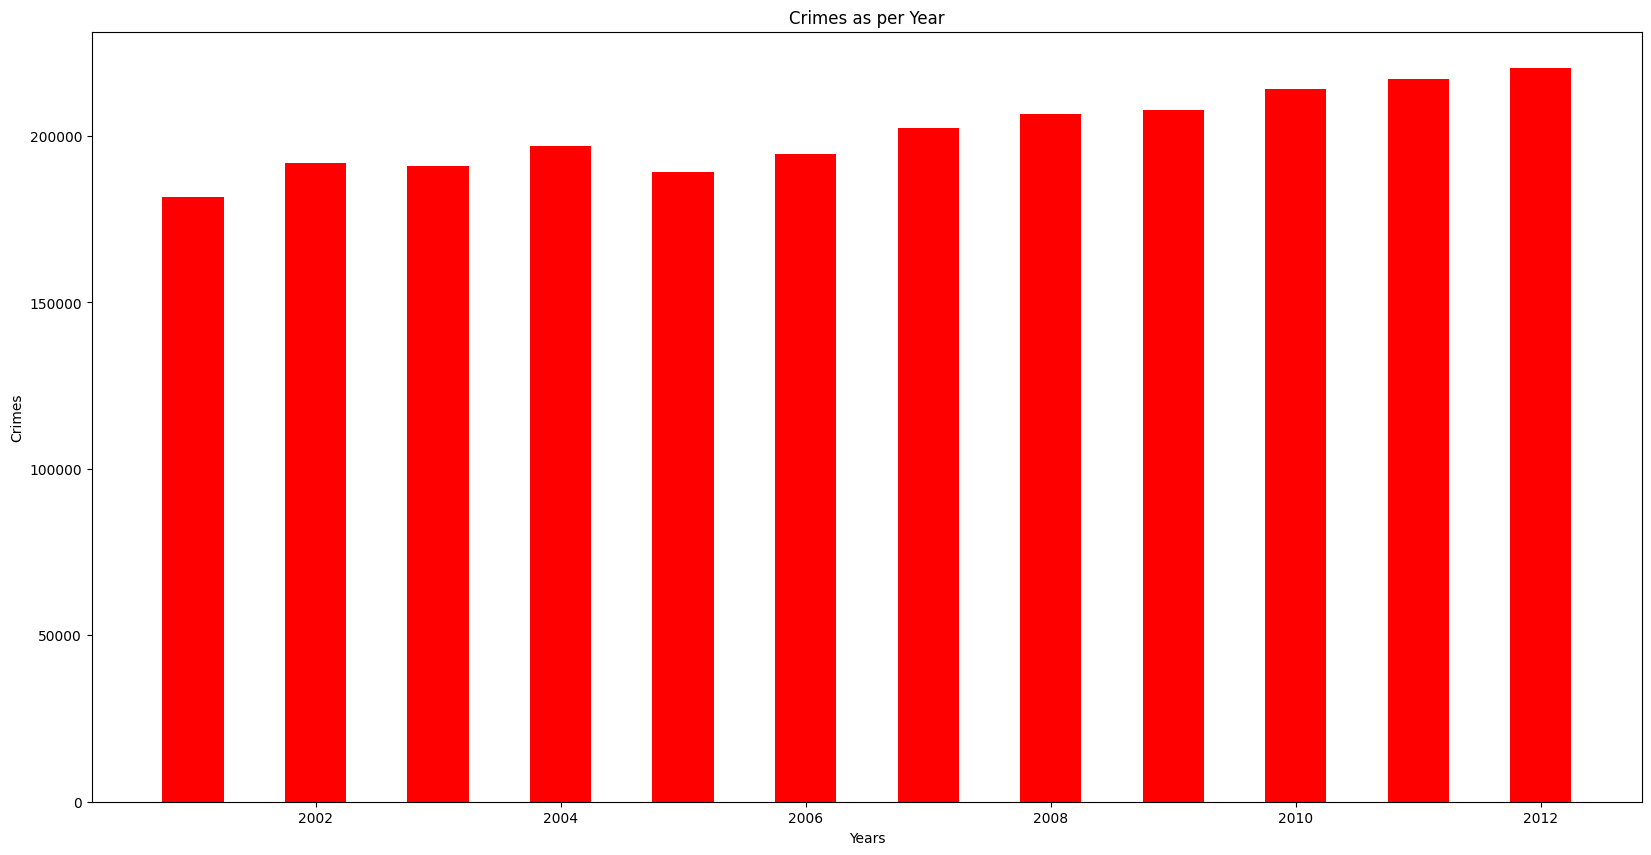

In [10]:
x = dw_01_12['YEAR']
y = dw_01_12['TOTAL IPC CRIMES']
z = dw_01_12['STATE/UT']
k = dw_01_12['KIDNAPPING & ABDUCTION']
fig = plt.figure(figsize = (20, 10))
plt.bar(x, y, color ='red', width = 0.5)
 
plt.xlabel("Years")
plt.ylabel("Crimes")
plt.title("Crimes as per Year")
plt.show()

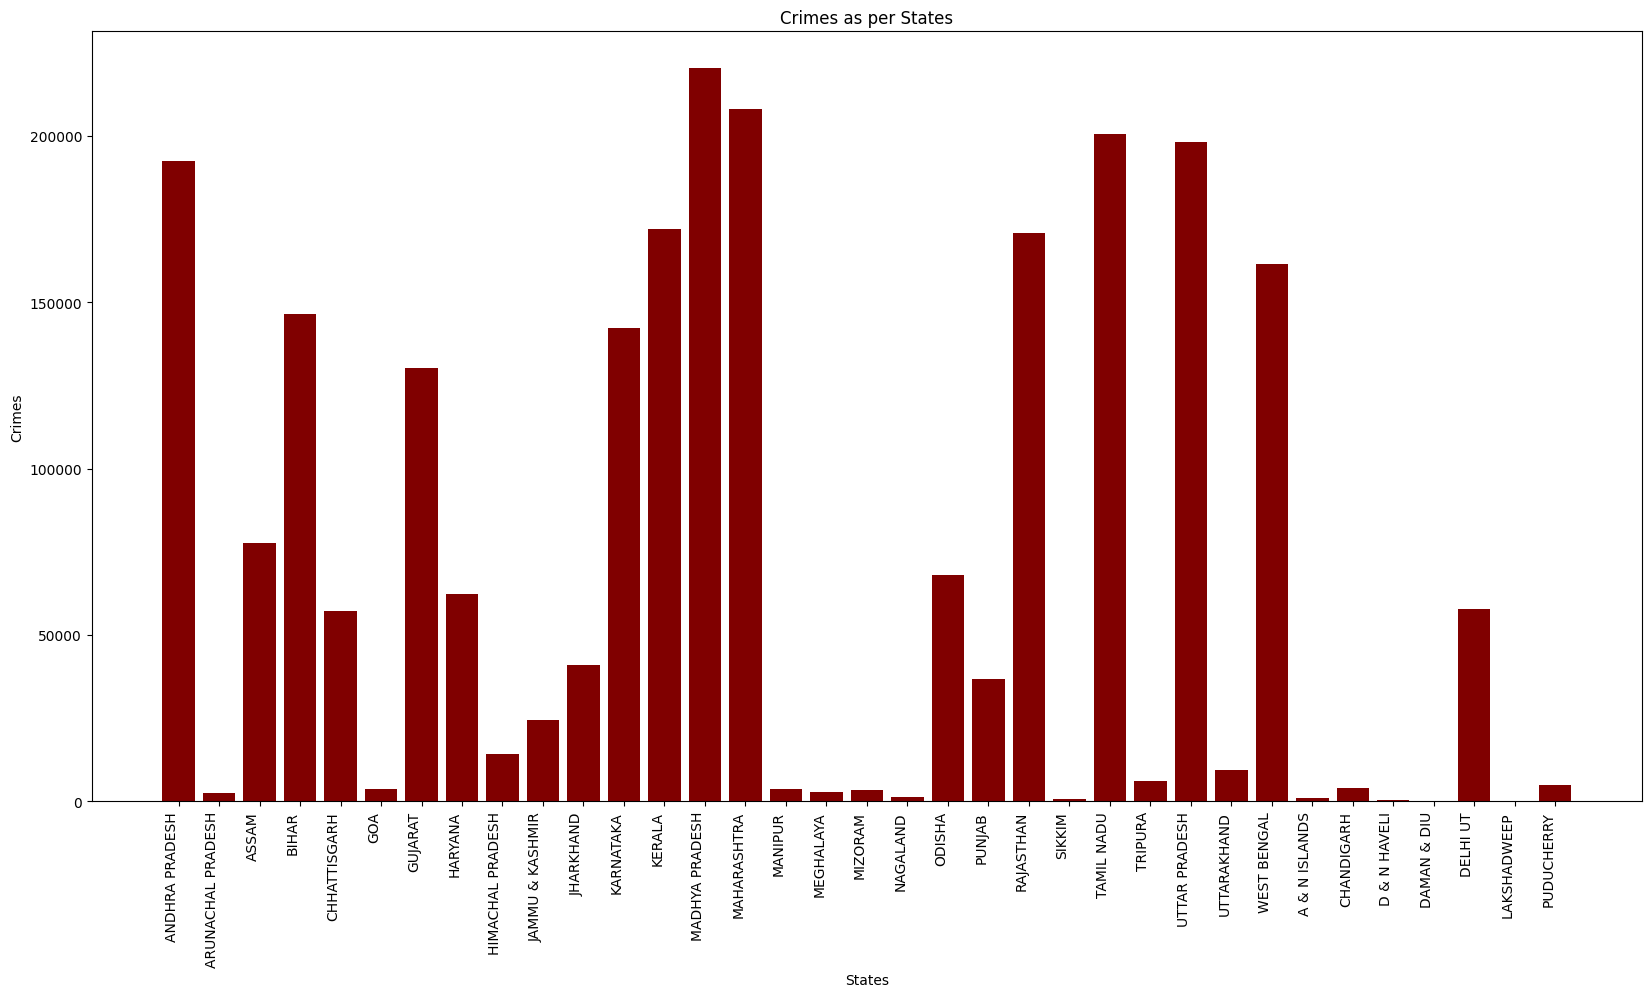

In [11]:
fig = plt.figure(figsize = (20, 10))
plt.bar(z, y, color ='maroon', width = 0.8)
 
plt.xlabel("States")
plt.ylabel("Crimes")
plt.title("Crimes as per States")

ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

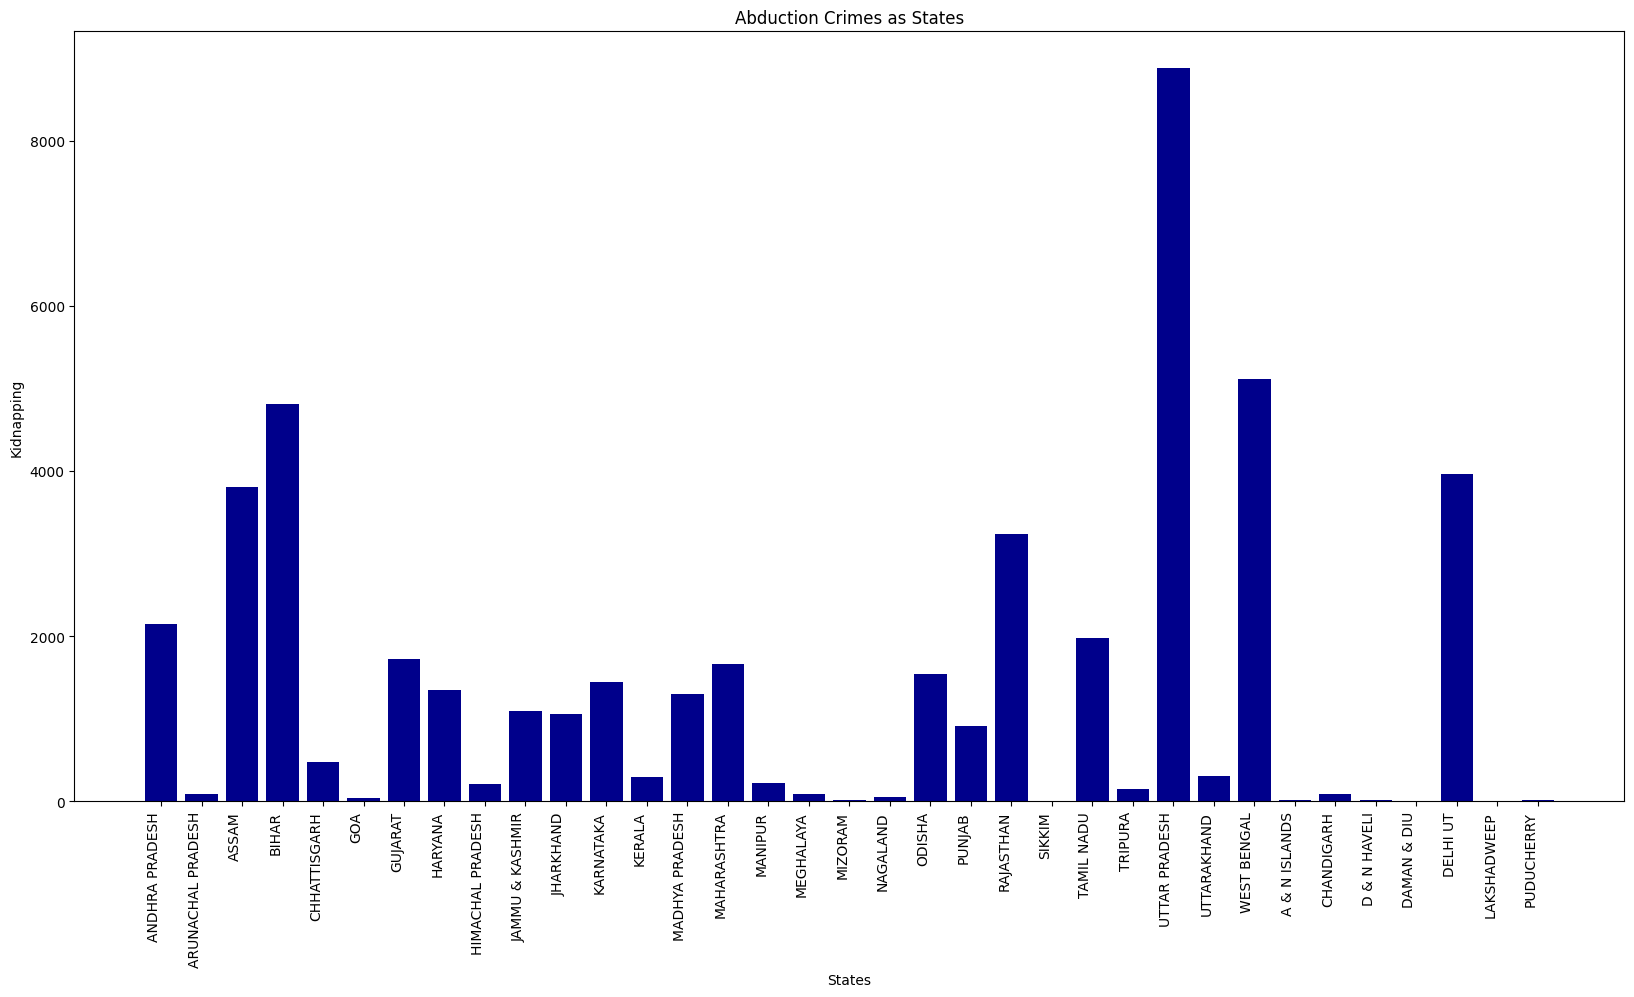

In [12]:
fig = plt.figure(figsize = (20, 10))
plt.bar(z, k, color ='darkblue', width = 0.8)
 
plt.xlabel("States")
plt.ylabel("Kidnapping")
plt.title("Abduction Crimes as States")

ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

# Data Cleaning and Preprocessing

In [13]:
# removing all the irrelevant columns
cols = [c for c in cbyp_2014.columns if c.lower()[:9] != 'residence']
cbyp_2014 = cbyp_2014[cols]
cols2 = [c for c in cbyp_01_12.columns if c.lower()[:11] != 'residential']
cbyp_01_12 = cbyp_01_12[cols2]
cols3 = [c for c in cbyp_2014.columns if c.lower()[-1] != 'n']
cbyp_2014 = cbyp_2014[cols3]
cols4 = [c for c in cbyp_2014.columns if c.lower()[:3] != 'atm']
cbyp_2014 = cbyp_2014[cols4]
cols5 = [c for c in cbyp_2014.columns if c.lower()[:9] != 'religious']
cbyp_2014 = cbyp_2014[cols5]
cols6 = [c for c in cbyp_2013.columns if c.lower()[:11] != 'residential']
cbyp_2013 = cbyp_2013[cols6]

dw_01_12 = dw_01_12.drop(["CRUELTY BY HUSBAND OR HIS RELATIVES"], axis = 1)
dw_01_12 = dw_01_12.drop(["DOWRY DEATHS"], axis = 1)
dw_01_12 = dw_01_12.drop(["DACOITY"], axis = 1)
dw_2013 = dw_2013.drop(["CRUELTY BY HUSBAND OR HIS RELATIVES"], axis = 1)
dw_2013 = dw_2013.drop(["DACOITY"], axis = 1)
dw_2013 = dw_2013.drop(["DOWRY DEATHS"], axis = 1)

In [14]:
# drop all irrelevant columns
dw_2014 = dw_2014.drop(
    ['Custodial_Gang Rape',
     'Attempt to commit Culpable Homicide',
     'Custodial_Other Rape',
     'Rape other than Custodial',
     'Rape_Gang Rape',
     'Dacoity',
     'Cruelty by Husband or his Relatives',
     'Dowry Deaths',
     'Attempt to commit Rape',
     'Kidnapping & Abduction',
     'Kidnapping & Abduction in order to Murder',
     'Kidnapping for Ransom',
     'Dacoity with Murder',
     'Other Dacoity',
     'House Trespass & House Breaking',
     'Unlawful Assembly',
     'Riots_Communal',
     'Riots_Industrial',
     'Riots_Political',
     'Riots_Caste Conflict',
     'Riots_SC/STs Vs Non-SCs/STs',
     'Riots_Other Caste Conflict',
     'Riots_Agrarian',
     'Riots_Students',
     'Riots_Sectarian',
     'Riots_Others',
     'Forgery',
     'Counterfeit Offences related to Counterfeit Coin',
     'Counterfeiting Government Stamp',
     'Counterfeit currency & Bank notes',
     'Counterfeiting currency notes/Bank notes',
     'Using forged or counterfeiting currency/Bank notes',
     'Possession of forged or counterfeiting currency/Bank notes',
     'Making or Possessing materials for forged currency/Bank notes',
     'Making or Using documents resembling currency',
     'Hurt',
     'Acid attack',
     'Attempt to Acid Attack',
     'Sexual Harassment',
     'Assault or use of criminal force to women with intent to Disrobe',
     'Voyeurism',
     'Stalking',
     'Other Assault on Women',
     'At Office premises',
     'Other places related to work',
     'In Public Transport system',
     'Places other than 231, 232 & 233',
     'Deaths due to negligent driving/act',
     'Deaths due to Other Causes',
     'Offences against State',
     'Sedition',
     'Other offences against State',
     'Offences promoting enmity between different groups',
     'Promoting enmity between different groups',
     'Imputation, assertions prejudicial to national integration',
     'Extortion',
     'Disclosure of Identity of Victims',
     'Incidence of Rash Driving',
     'HumanTrafficking',
     'Unnatural Offence'], axis=1)

dict1 = {
    'States/UTs' : 'STATE/UT',
    'Year' : 'YEAR',
    'Highways_Dacoity_Cases reported' : 'HIGHWAYS - Dacoity',
    'Highways_Robbery_Cases reported' : 'HIGHWAYS - Robbery',
    'Highways_Burglary_Cases reported' : 'HIGHWAYS - Burglary',
    'Highways_Theft_Cases reported' : 'HIGHWAYS - Theft',
    'RiverOrSea_Dacoity_Cases reported' : 'RIVER and SEA - Dacoity',
    'RiverOrSea_Robbery_Cases reported' : 'RIVER and SEA - Robbery',
    'RiverOrSea_Burglary_Cases reported' : 'RIVER and SEA - Burglary',
    'RiverOrSea_Theft_Cases reported' : 'RIVER and SEA - Theft',
    'Railways_Dacoity_Cases reported' : 'RAILWAYS - Dacoity',
    'Railways_Robbery_Cases reported' : 'RAILWAYS - Robbery',
    'Railways_Burglary_Cases reported' : 'RAILWAYS - Burglary',
    'Railways_Theft_Cases reported' : 'RAILWAYS - Theft',
    'Bank_Dacoity_Cases reported' : 'BANKS - Dacoity',
    'Bank_Robbery_Cases reported' : 'BANKS - Robbery',
    'Bank_Burglary_Cases reported' : 'BANKS - Burglary',
    'Bank_Theft_Cases reported' : 'BANKS - Theft',
    'CommEst_Dacoity_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Dacoity',
    'CommEst_Robbery_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Robbery',
    'CommEst_Burglary_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Burglary',
    'CommEst_Theft_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Theft',
    'OtherPlaces_Dacoity_Cases reported' : 'OTHER PLACES - Dacoity',
    'OtherPlaces_Robbery_Cases reported' : 'OTHER PLACES - Robbery',
    'OtherPlaces_Burglary_Cases reported' : 'OTHER PLACES - Burglary',
    'OtherPlaces_Theft_Cases reported' : 'OTHER PLACES - Theft',
    'Total_Dacoity_Cases reported' : 'TOTAL - Dacoity',
    'Total_Robbery_Cases reported' : 'TOTAL - Robbery',
    'Total_Burglary_Cases reported' : 'TOTAL - Burglary',
    'Total_Theft_Cases reported' : 'TOTAL - Theft'
}

cbyp_2014.rename(columns=dict1, inplace=True)

dict2 = {
    'States/UTs' : 'STATE/UT',
    'District' : 'DISTRICT',
    'Year' : 'YEAR',
    'Murder' : 'MURDER',
    'Attempt to commit Murder' : 'ATTEMPT TO MURDER',
    'Culpable Homicide not amounting to Murder' : 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
    'Rape' : 'RAPE',
    'Custodial Rape' : 'CUSTODIAL RAPE',
    'Rape_Others' : 'OTHER RAPE',
    'Kidnapping & Abduction_Total' : 'KIDNAPPING & ABDUCTION',
    'Kidnapping & Abduction of Women to compel her for marriage' : 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
    'Other Kidnapping' : 'KIDNAPPING AND ABDUCTION OF OTHERS',
    'Making Preparation and Assembly for committing Dacoity' : 'PREPARATION AND ASSEMBLY FOR DACOITY',
    'Robbery' : 'ROBBERY',
    'Criminal Trespass/Burglary' : 'BURGLARY',
    'Criminal Trespass or Burglary' : 'BURGLARY2',
    'Theft' : 'THEFT',
    'Auto Theft' : 'AUTO THEFT',
    'Other Thefts' : 'OTHER THEFT',
    'Riots' : 'RIOTS',
    'Criminal Breach of Trust' : 'CRIMINAL BREACH OF TRUST',
    'Cheating' : 'CHEATING',
    'Counterfeiting' : 'COUNTERFIETING',
    'Arson' : 'ARSON',
    'Grievous Hurt' : 'HURT/GREVIOUS HURT',
    'Assault on Women with intent to outrage her Modesty' : 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
    'Insult to the Modesty of Women' : 'INSULT TO MODESTY OF WOMEN',
    'Importation of Girls from Foreign Country' : 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'Causing Death by Negligence' : 'CAUSING DEATH BY NEGLIGENCE',
    'Other IPC crimes' : 'OTHER IPC CRIMES',
    'Total Cognizable IPC crimes' : 'TOTAL IPC CRIMES'
}

dw_2014.rename(columns=dict2, inplace=True)

In [15]:
# remove residential crime columns
cols = [c for c in cbyp_2014.columns if c != 'residence']
cbyp_2014 = cbyp_2014[cols]

In [16]:
# merging the two same named columns
dw_2014['BURGLARY'] = dw_2014['BURGLARY'] + dw_2014['BURGLARY2']
del dw_2014['BURGLARY2']

In [17]:
# concatenate individual datasets into one
frames1 = [cbyp_01_12,cbyp_2013,cbyp_2014]
by_place = pd.concat(frames1)
frames2 = [dw_01_12,dw_2013,dw_2014]
dist_wise = pd.concat(frames2)
print(by_place.shape)
print(dist_wise.shape)

(534, 30)
(10678, 30)


In [18]:
by_place.head()

,STATE/UT,YEAR,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,RIVER and SEA - Dacoity,RIVER and SEA - Robbery,RIVER and SEA - Burglary,RIVER and SEA - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,ANDHRA PRADESH,2001,57,172,31,74,2,11,101,110,...,1041,2502,37,232,862,8849,214,629,7220,16751
1,ARUNACHAL PRADESH,2001,0,0,0,8,0,0,0,1,...,84,54,8,40,65,249,22,84,248,443
2,ASSAM,2001,46,136,7,87,1,0,0,8,...,442,967,77,261,271,1342,532,687,2423,5367
3,BIHAR,2001,162,826,0,257,1,0,0,0,...,231,686,210,880,505,2582,1291,2203,3233,9701
4,CHHATTISGARH,2001,10,38,12,72,0,0,0,2,...,370,299,15,239,420,2835,87,338,4144,4812


In [19]:
dist_wise.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,104,1,30,1131,149,34,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,65,8,69,1543,118,24,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,209,9,38,2088,112,83,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,37,2,23,795,126,38,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,220,3,41,1244,109,58,0,431,2313,6507


In [20]:
indexDaman = by_place[(by_place['STATE/UT'] == 'DAMAN & DIU') & (by_place['COMMERCIAL ESTABLISHMENTS - Burglary'] == 0)].index
by_place.drop(indexDaman , inplace=True)

In [21]:
# renaming all the columns to one common name
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['A & N ISLANDS'],'A&N ISLANDS')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['D & N HAVELI'],'D&N HAVELI')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['DELHI UT'],'DELHI')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['TOTAL (ALL-INDIA)'],'TOTAL (ALL INDIA)')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['TOTAL (STATE)'],'TOTAL (STATES)')

dist_wise['STATE/UT'] = dist_wise['STATE/UT'].replace(['A & N ISLANDS'],'A&N ISLANDS')
dist_wise['STATE/UT'] = dist_wise['STATE/UT'].replace(['D & N HAVELI'],'D&N HAVELI')
dist_wise['STATE/UT'] = dist_wise['STATE/UT'].replace(['DELHI UT'],'DELHI')

In [22]:
# uppercase'ing all the State & District Names for uniformity
bUpper = by_place['STATE/UT'].map(lambda x : x.upper())
by_place['STATE/UT'] = bUpper

dUpper = dist_wise['STATE/UT'].map(lambda x : x.upper())
dist_wise['STATE/UT'] = dUpper

iUpper = dist_wise['DISTRICT'].map(lambda x : x.upper())
dist_wise['DISTRICT'] = iUpper

In [23]:
for i in dist_wise['STATE/UT'].unique():
  print(i)

ANDHRA PRADESH
ARUNACHAL PRADESH
ASSAM
BIHAR
CHHATTISGARH
GOA
GUJARAT
HARYANA
HIMACHAL PRADESH
JAMMU & KASHMIR
JHARKHAND
KARNATAKA
KERALA
MADHYA PRADESH
MAHARASHTRA
MANIPUR
MEGHALAYA
MIZORAM
NAGALAND
ODISHA
PUNJAB
RAJASTHAN
SIKKIM
TAMIL NADU
TRIPURA
UTTAR PRADESH
UTTARAKHAND
WEST BENGAL
A&N ISLANDS
CHANDIGARH
D&N HAVELI
DAMAN & DIU
DELHI
LAKSHADWEEP
PUDUCHERRY
DELHI UT
TELANGANA


In [24]:
print(dw_01_12.shape)
print(dw_2013.shape)
print(dw_2014.shape)

print(cbyp_01_12.shape)
print(cbyp_2013.shape)
print(cbyp_2014.shape)

(9017, 30)
(823, 30)
(838, 30)
(457, 30)
(38, 30)
(39, 30)


It is clearly evident that all the tables, now are under a common structure.

In [25]:
# group both the datasets
place_group = by_place.groupby(['STATE/UT'], as_index=False).sum()
district_group = dist_wise.groupby(['STATE/UT', 'DISTRICT'], as_index=False).sum()

In [26]:
state_group = district_group[district_group['DISTRICT'] == 'TOTAL']
# state_group['CASES'] = state_group['OTHER IPC CRIMES'] + state_group['TOTAL IPC CRIMES']
# state_group = state_group.drop(['OTHER IPC CRIMES', 'TOTAL IPC CRIMES'], axis=1)
state_group

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
8,A&N ISLANDS,TOTAL,26092,168,76,25,141,0,140,116,...,324,12,103,1134,255,48,0,66,4584,9848
36,ANDHRA PRADESH,TOTAL,26092,32931,23960,1815,14440,2,14424,22305,...,103934,3269,12418,547162,56546,38780,17,145814,526439,2133585
70,ARUNACHAL PRADESH,TOTAL,26092,927,465,40,583,4,574,1003,...,623,53,289,5404,905,21,0,830,8116,30495
108,ASSAM,TOTAL,26092,16883,6804,775,18158,5,18130,32762,...,15347,960,8661,76766,16719,113,9,32284,210566,692101
160,BIHAR,TOTAL,26092,44648,45298,3873,14251,2,14225,43790,...,35877,1136,9026,206617,8148,295,445,49161,614390,1523888
164,CHANDIGARH,TOTAL,26092,267,334,85,340,0,340,827,...,2548,27,75,835,401,145,0,195,12085,44028
199,CHHATTISGARH,TOTAL,26092,13058,8626,377,13274,0,13210,5359,...,7928,599,3444,88987,21287,1804,5,29194,267752,619227
203,D&N HAVELI,TOTAL,26092,112,32,5,61,0,61,155,...,193,15,60,331,52,5,0,213,1889,4928
207,DAMAN & DIU,TOTAL,26092,75,44,2,22,0,22,41,...,111,30,34,205,18,2,0,328,698,3181
255,DELHI UT,TOTAL,2014,586,770,58,2096,0,1949,7143,...,4601,74,190,690,4322,1361,0,1959,21396,155654


In [27]:
place_group

,STATE/UT,YEAR,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,RIVER and SEA - Dacoity,RIVER and SEA - Robbery,RIVER and SEA - Burglary,RIVER and SEA - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,A & N ISLANDS,2014,0,0,0,0,0,0,0,0,...,9,6,0,2,13,31,0,2,64,45
1,A&N ISLANDS,26091,0,0,0,0,0,0,1,40,...,115,146,16,64,201,698,16,75,934,1161
2,ANDHRA PRADESH,28105,527,1750,505,6135,3,23,101,503,...,13281,34585,607,3452,16549,162292,2187,8747,111875,333839
3,ARUNACHAL PRADESH,28105,24,104,9,219,0,2,0,5,...,759,987,112,339,891,2403,296,979,3200,6190
4,ASSAM,28105,457,1157,597,2172,19,15,16,50,...,6734,13945,943,4095,13068,43200,4683,9428,43997,108727
5,BIHAR,28105,2387,14381,305,7102,4,38,0,80,...,3617,18278,1652,7670,7532,74541,12216,26787,49152,197683
6,CHANDIGARH,28105,0,0,0,0,0,0,0,0,...,1064,4864,31,386,180,8881,48,524,3339,21253
7,CHHATTISGARH,28105,134,849,762,1245,5,2,0,13,...,4047,5922,606,3997,6457,44100,1573,5869,51430,74160
8,D&N HAVELI,28105,1,7,1,43,0,0,0,21,...,150,222,12,11,76,262,41,32,424,869
9,DAMAN & DIU,28105,0,0,0,1,1,0,0,7,...,250,91,17,15,50,432,40,29,520,633


# Discrepancies Resolved
by_place
  1. 2008 -> daman & diu repeats
  2. 2014 -> telangana extra state

dist_wise
  1. dist_wise had two burglaries. hence, 31 
  


* dropped all the residence-based crimes columns
* renamed all the columns to common names
* merged three datasets to one dataset





In [28]:
print(by_place.info())
print(dist_wise.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 38
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              533 non-null    object
 1   YEAR                                  533 non-null    int64 
 2   HIGHWAYS - Dacoity                    533 non-null    int64 
 3   HIGHWAYS - Robbery                    533 non-null    int64 
 4   HIGHWAYS - Burglary                   533 non-null    int64 
 5   HIGHWAYS - Theft                      533 non-null    int64 
 6   RIVER and SEA - Dacoity               533 non-null    int64 
 7   RIVER and SEA - Robbery               533 non-null    int64 
 8   RIVER and SEA - Burglary              533 non-null    int64 
 9   RIVER and SEA - Theft                 533 non-null    int64 
 10  RAILWAYS - Dacoity                    533 non-null    int64 
 11  RAILWAYS - Robbery               

In [29]:
import base64
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [30]:
create_download_link(by_place)
create_download_link(dist_wise)
create_download_link(state_group)

# Model Building

In [31]:
# choosing features for training and testing
d = pd.DataFrame()
d['STATE'] = district_group['STATE/UT']
d['DISTRICT'] = district_group['DISTRICT']
d['CASES'] = district_group['TOTAL IPC CRIMES']
d.head()

,STATE,DISTRICT,CASES
0,A&N ISLANDS,A AND N ISLANDS,807
1,A&N ISLANDS,ANDAMAN,7377
2,A&N ISLANDS,CAR,48
3,A&N ISLANDS,NICOBAR,266
4,A&N ISLANDS,NORTH,271


In [32]:
d.head()

,STATE,DISTRICT,CASES
0,A&N ISLANDS,A AND N ISLANDS,807
1,A&N ISLANDS,ANDAMAN,7377
2,A&N ISLANDS,CAR,48
3,A&N ISLANDS,NICOBAR,266
4,A&N ISLANDS,NORTH,271


In [33]:
d.shape

(1085, 3)

In [34]:
le_state = LabelEncoder().fit(d[['STATE']])
le_dist = LabelEncoder().fit(d[['DISTRICT']])

d['STATE'] = le_state.transform(d[['STATE']])
d['DISTRICT'] = le_dist.transform(d[['DISTRICT']])

In [35]:
d.head()

,STATE,DISTRICT,CASES
0,0,2,807
1,0,37,7377
2,0,153,48
3,0,641,266
4,0,644,271


### Outlier Detection and Analysis

In [36]:
d[['CASES']].describe()

,CASES
count,1.085000e+03
mean,5.428076e+04
std,2.055852e+05
min,0.000000e+00
25%,3.672000e+03
50%,1.852900e+04
75%,4.590300e+04
max,2.686193e+06


In [37]:
fig = px.scatter_matrix(d,width=500, height=500)
fig.show()

In [38]:
fig = px.histogram(d, x='CASES')
fig.show()

In [39]:
fig = px.box(d['CASES'])
fig.show()

In [40]:
fig = px.scatter(x=d['DISTRICT'], y=d['CASES'])
fig.show()

In [41]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [42]:
outliers = find_outliers_IQR(d['CASES'])
print("Number of outliers: "+ str(len(outliers)))
print("Max outlier value: "+ str(outliers.max()))
print("Min outlier value: "+ str(outliers.min()))
outliers

Number of outliers: 66
Max outlier value: 2686193
Min outlier value: 109347


14       161735
18       111014
20       219286
36      2133585
47       218015
         ...   
1038     136479
1064     211416
1067     112761
1082    1312352
1084     169535
Name: CASES, Length: 66, dtype: int64

In [43]:
outliers = find_outliers_IQR(d[["DISTRICT","CASES"]])
outliers

,DISTRICT,CASES
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1080,NaN,NaN
1081,NaN,NaN
1082,NaN,1312352.0
1083,NaN,NaN


In [44]:
upper_limit = d['CASES'].mean() + 3*d['CASES'].std()
print(upper_limit)
lower_limit = d['CASES'].mean() - 3*d['CASES'].std()
print(lower_limit)

671036.2841729891
-562474.754219072


In [45]:
d['CASES'] = np.where(d['CASES'] > upper_limit,
   upper_limit,
   np.where(
       d['CASES'] < lower_limit,
       lower_limit,
       d['CASES']
   )
)

In [46]:
d[['CASES']].describe()

,CASES
count,1085.000000
mean,41310.521639
std,88304.701718
min,0.000000
25%,3672.000000
50%,18529.000000
75%,45903.000000
max,671036.284173


In [47]:
fig = px.scatter(x=d['DISTRICT'], y=d['CASES'])
fig.show()

In [48]:
fig = px.box(d, y='CASES')
fig.show()

In [49]:
print(np.where(d['CASES']>108817))

(array([  14,   18,   20,   36,   47,  108,  147,  160,  162,  194,  199,
        212,  255,  265,  307,  311,  320,  350,  371,  408,  439,  443,
        487,  495,  496,  500,  501,  508,  512,  519,  522,  524,  536,
        550,  553,  556,  574,  586,  587,  591,  610,  611,  614,  626,
        637,  639,  643,  741,  786,  789,  793,  838,  840,  850,  896,
        906,  990, 1018, 1021, 1033, 1037, 1038, 1064, 1067, 1082, 1084]),)


In [50]:
d.iloc[788]

STATE          29.0
DISTRICT       12.0
CASES       95564.0
Name: 788, dtype: float64

In [51]:
d.iloc[1021]

STATE           34.0
DISTRICT       953.0
CASES       226445.0
Name: 1021, dtype: float64

In [52]:
fig1 = px.scatter(d, x="STATE", y="CASES", color="CASES", size='CASES', hover_data=['STATE', 'DISTRICT', 'CASES'])
fig1.show()

## Clustering

### K-Means Clustering

In [53]:
d.describe()

,STATE,DISTRICT,CASES
count,1085.000000,1085.000000,1085.000000
mean,19.280184,505.326267,41310.521639
std,10.806621,287.966302,88304.701718
min,0.000000,0.000000,0.000000
25%,12.000000,257.000000,3672.000000
50%,20.000000,509.000000,18529.000000
75%,29.000000,765.000000,45903.000000
max,36.000000,953.000000,671036.284173


In [54]:
scaler_state = MinMaxScaler().fit(d[['STATE']])
scaler_dist = MinMaxScaler().fit(d[['DISTRICT']])
scaler_cases = MinMaxScaler().fit(d[['CASES']])

d['STATE'] = scaler_state.transform(d[['STATE']])
d['DISTRICT'] = scaler_dist.transform(d[['DISTRICT']])
d['CASES'] = scaler_cases.transform(d[['CASES']])

In [55]:
X = d[['STATE', 'DISTRICT', 'CASES']]
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=5,
            y=inertia[4],
            xref="x",
            yref="y",
            text="Optimum!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [56]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
X = d[['STATE', 'DISTRICT', 'CASES']]
se = [] 
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 7)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))
 
    print('Intertia at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

Intertia at K = 2 : 139.09259105799254
Silhouette Coefficient: 0.343
Calinski-Harabasz Index: 594.351
Davies-Bouldin Index: 1.216
---------------------------------------------------------------
Intertia at K = 3 : 95.69104816260906
Silhouette Coefficient: 0.352
Calinski-Harabasz Index: 676.945
Davies-Bouldin Index: 0.959
---------------------------------------------------------------
Intertia at K = 4 : 67.73893453682999
Silhouette Coefficient: 0.377
Calinski-Harabasz Index: 785.617
Davies-Bouldin Index: 0.863
---------------------------------------------------------------
Intertia at K = 5 : 54.65814219326771
Silhouette Coefficient: 0.394
Calinski-Harabasz Index: 794.233
Davies-Bouldin Index: 0.757
---------------------------------------------------------------
Intertia at K = 6 : 45.94563826594802
Silhouette Coefficient: 0.384
Calinski-Harabasz Index: 796.028
Davies-Bouldin Index: 0.831
---------------------------------------------------------------


**FACTS**
1.   *A good model is one with **low** inertia AND a low number of clusters (K)*
2.   *The **higher** the Silhouette Coefficients (the closer to +1), the more is the separation between clusters*
3.   *The **higher** the index the better is clustering*
4.   *The main motive is to **decrease** the DB index*

**INFERENCE**

Therefore, here n={5} might **best fit** the application.

In [57]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(d[['STATE','DISTRICT', 'CASES']])
d['cluster'] = y_pred
d['cluster'].value_counts()

0    301
4    265
3    262
1    239
2     18
Name: cluster, dtype: int64

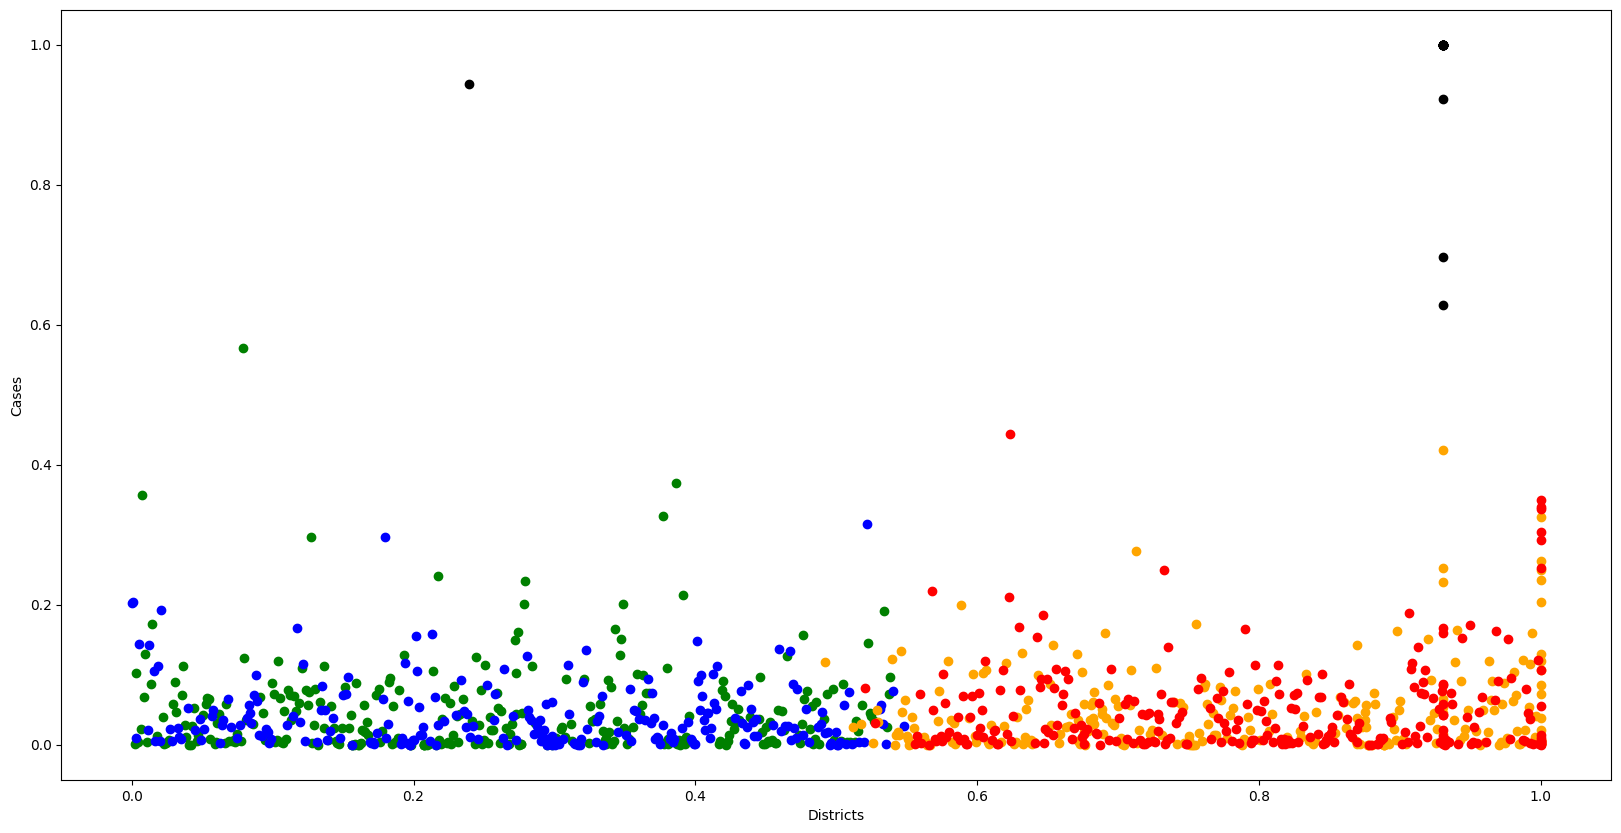

In [58]:
df1 = d[d.cluster==0]
df2 = d[d.cluster==1]
df3 = d[d.cluster==2]
df4 = d[d.cluster==3]
df5 = d[d.cluster==4]

plt.figure(figsize=(20,10))
plt.scatter(df1['DISTRICT'],df1['CASES'],color='green')
plt.scatter(df2['DISTRICT'],df2['CASES'],color='blue')
plt.scatter(df3['DISTRICT'],df3['CASES'],color='black')
plt.scatter(df4['DISTRICT'],df4['CASES'],color='orange')
plt.scatter(df5['DISTRICT'],df5['CASES'],color='red')

plt.xlabel('Districts')
plt.ylabel('Cases')

plt.show()

### DB-SCAN

Text(0, 0.5, 'CASES')

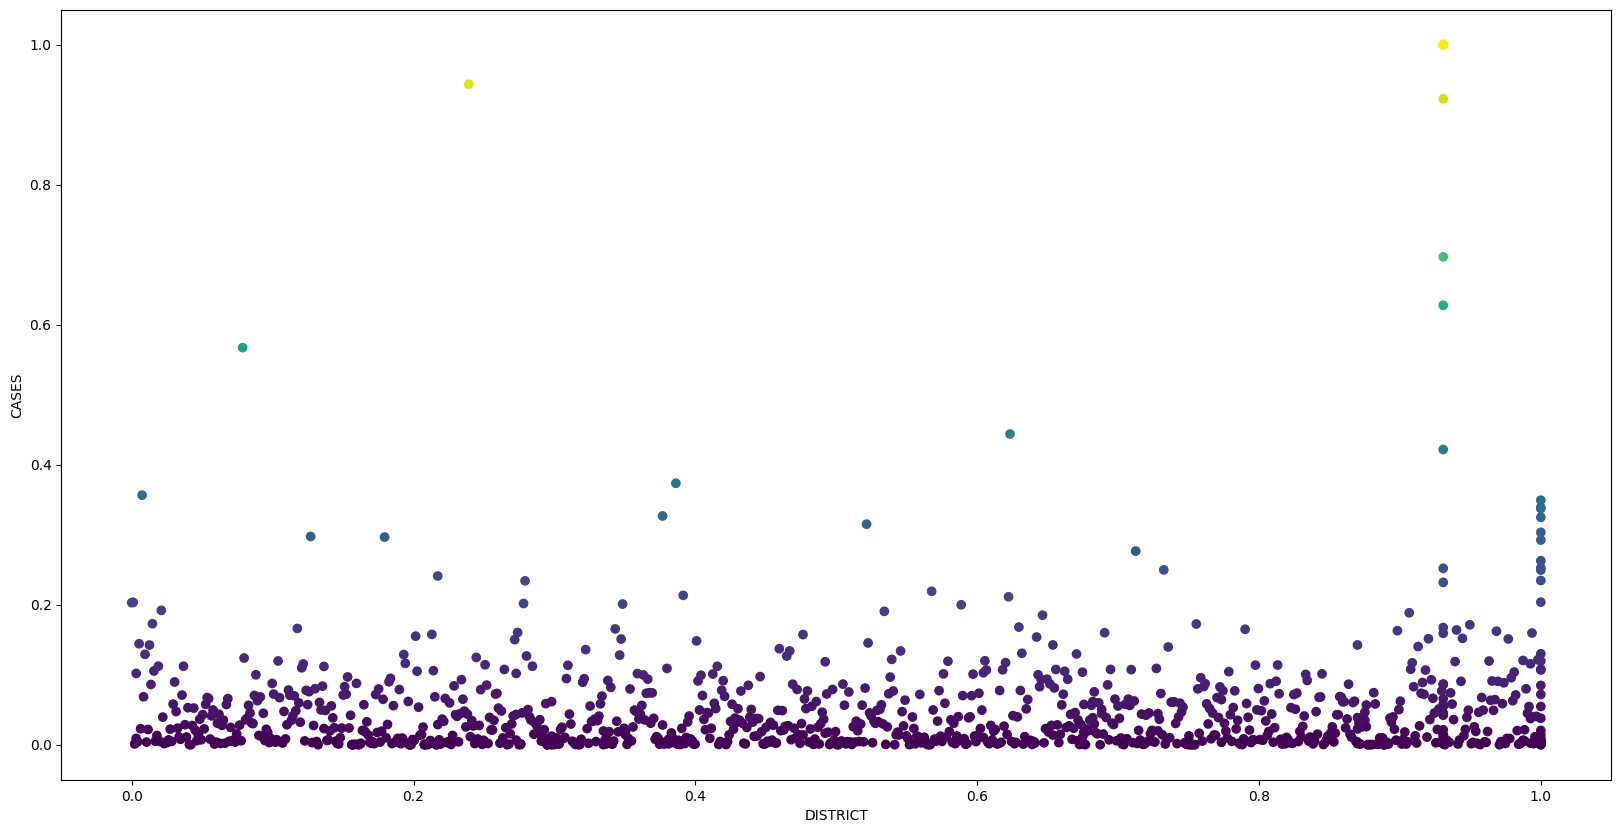

In [59]:
plt.figure(figsize=(20,10))
plt.scatter(d["DISTRICT"], d["CASES"], c= d["CASES"], label = d["CASES"])
plt.xlabel("DISTRICT")
plt.ylabel("CASES")

Text(0, 0.5, 'CASES')

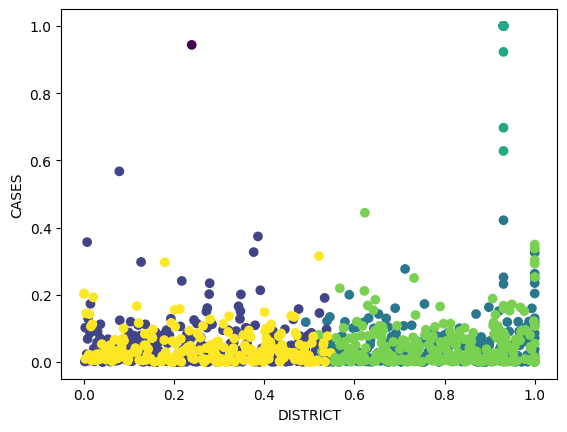

In [60]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(d)

plt.scatter(d["DISTRICT"], 
            d["CASES"], 
            c=dbscan_cluster1.labels_, 
            label=d["CASES"])
plt.xlabel("DISTRICT")
plt.ylabel("CASES")

Text(0, 0.5, 'CASES')

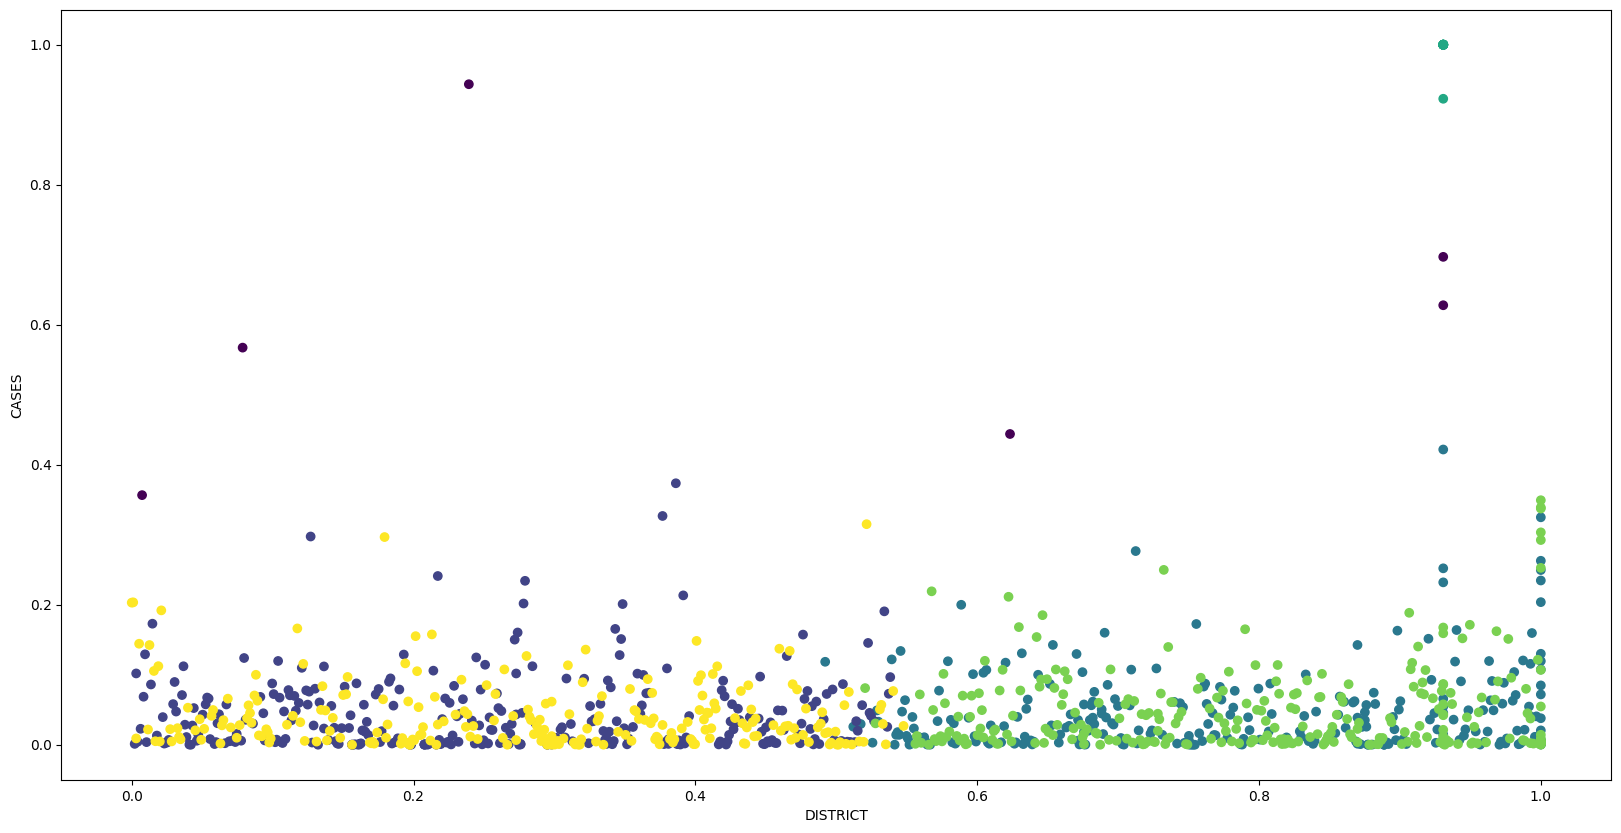

In [61]:
dbscan_cluster1 = DBSCAN(eps=0.2, min_samples=5)
dbscan_cluster1.fit(d)
plt.figure(figsize=(20,10))

plt.scatter(d["DISTRICT"], 
            d["CASES"], 
            c=dbscan_cluster1.labels_, 
            label=d["CASES"])
plt.xlabel("DISTRICT")
plt.ylabel("CASES")

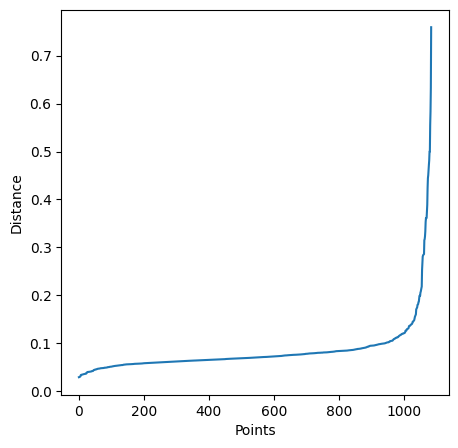

In [62]:
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(d)
distances, indices = neighbors.kneighbors(d)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

0.10595495160282482


<Figure size 500x500 with 0 Axes>

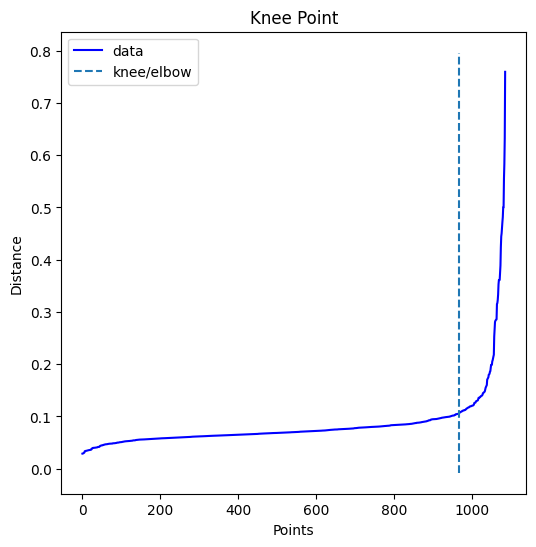

In [63]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
eps = distances[knee.knee]
print(eps)

Text(0, 0.5, 'CASES')

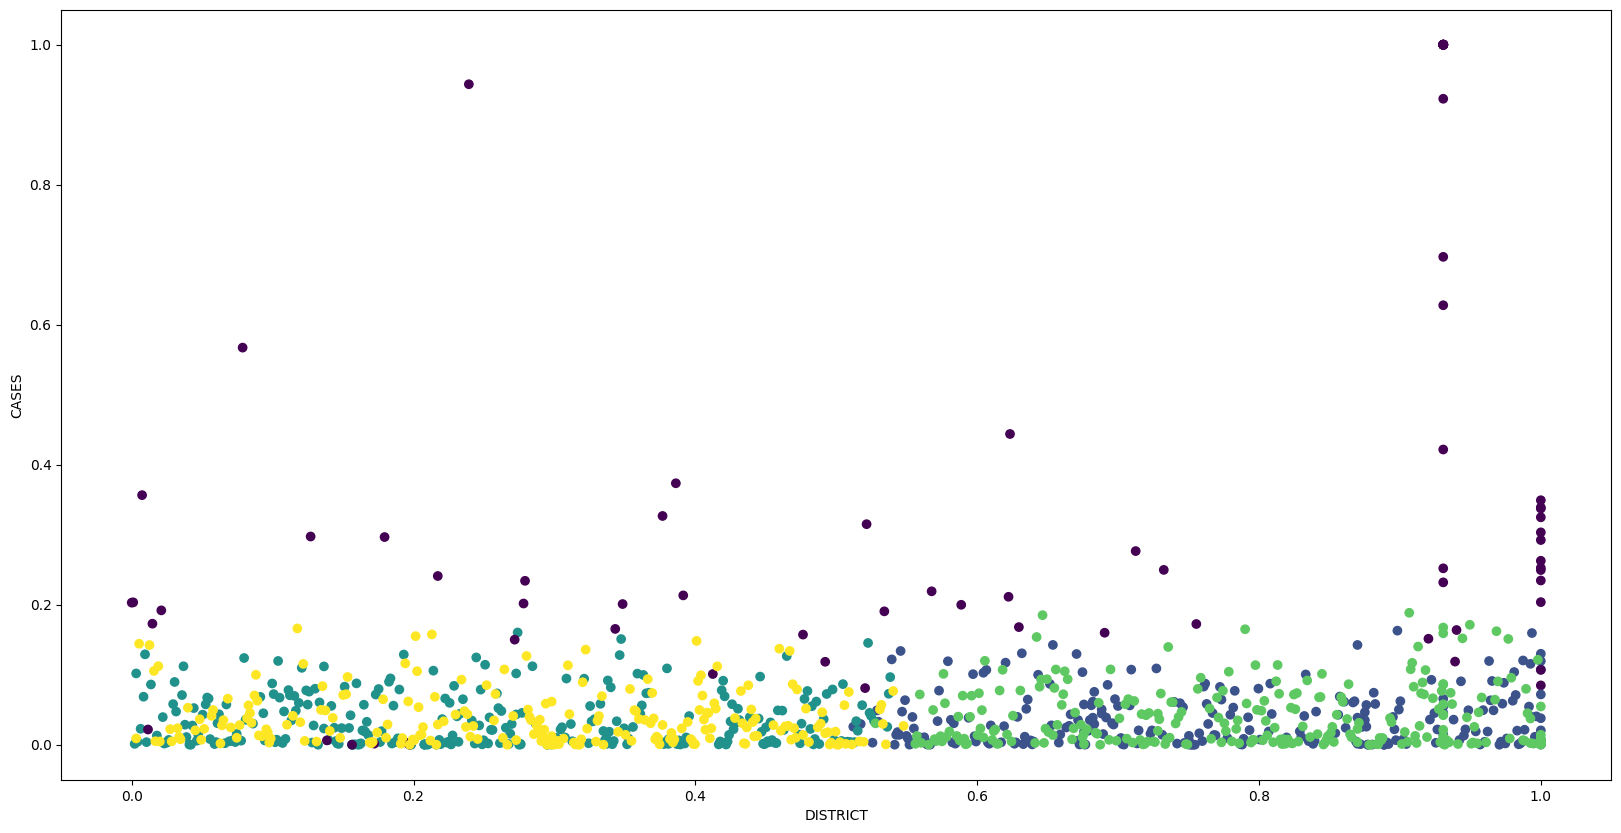

In [64]:
dbscan_cluster1 = DBSCAN(eps=eps, min_samples=20)
dbscan_cluster1.fit(d)
plt.figure(figsize=(20,10))

plt.scatter(d["DISTRICT"], 
            d["CASES"], 
            c=dbscan_cluster1.labels_, 
            label=d["CASES"])
plt.xlabel("DISTRICT")
plt.ylabel("CASES")

In [65]:
y_pred = dbscan_cluster1.fit_predict(d)
d['cluster_dbscan'] = y_pred

In [66]:
d.cluster_dbscan.value_counts()

 1    286
 2    252
 0    245
 3    227
-1     75
Name: cluster_dbscan, dtype: int64

- DBSCAN has a notion of noise, and is robust to outliers. 
- DBSCAN requires just two parameters and is mostly insensitive to the ordering of the points in the database.

In [67]:
print('Km Cluster 0 => ' + str(d[d['cluster'] == 0]['CASES'].mean()) + "  => HIGH")
print('Km Cluster 1 => ' + str(d[d['cluster'] == 1]['CASES'].mean()) + "  => MODERATE")
print('Km Cluster 2 => ' + str(d[d['cluster'] == 2]['CASES'].mean()) + " => VERY LOW")
print('Km Cluster 3 => ' + str(d[d['cluster'] == 3]['CASES'].mean()) + " => LOW")
print('Km Cluster 4 => ' + str(d[d['cluster'] == 4]['CASES'].mean()) + "  => VERY HIGH")

Km Cluster 0 => 0.0462188047772033  => HIGH
Km Cluster 1 => 0.040329859653614936  => MODERATE
Km Cluster 2 => 0.9550641009788746 => VERY LOW
Km Cluster 3 => 0.04797134254827145 => LOW
Km Cluster 4 => 0.05088576733000091  => VERY HIGH


In [68]:
print('DBS Cluster -1 => ' + str(d[d['cluster_dbscan'] == -1]['CASES'].mean()) + " => VERY HIGH")
print('DBS Cluster  0 => ' + str(d[d['cluster_dbscan'] == 0]['CASES'].mean()) + " => LOW")
print('DBS Cluster  1 => ' + str(d[d['cluster_dbscan'] == 1]['CASES'].mean()) + " => VERY LOW")
print('DBS Cluster  2 => ' + str(d[d['cluster_dbscan'] == 2]['CASES'].mean()) + " => HIGH")
print('DBS Cluster  3 => ' + str(d[d['cluster_dbscan'] == 3]['CASES'].mean()) + " => MODERATE")

DBS Cluster -1 => 0.3915342770216384 => VERY HIGH
DBS Cluster  0 => 0.03649380202488338 => LOW
DBS Cluster  1 => 0.03518449074503905 => VERY LOW
DBS Cluster  2 => 0.04020080441096403 => HIGH
DBS Cluster  3 => 0.0365447192313033 => MODERATE


In [69]:
d.sample(10)

,STATE,DISTRICT,CASES,cluster,cluster_dbscan
786,0.777778,0.930745,0.627824,2,-1
149,0.111111,0.714586,0.020503,3,0
350,0.361111,0.930745,1.000000,2,-1
88,0.083333,0.328437,0.036470,0,1
704,0.722222,0.110178,0.028498,1,3
110,0.083333,1.000000,0.129927,3,0
698,0.694444,0.994753,0.001608,4,2
24,0.027778,0.545645,0.133936,3,0
931,0.916667,0.930745,0.086781,4,2
743,0.750000,0.471144,0.009843,1,3


In [70]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
clustering = DBSCAN(eps=eps, min_samples=20).fit(d)
labels = clustering.labels_

print("Silhouette Coefficient: %0.3f"%metrics.silhouette_score(d, labels))

Silhouette Coefficient: 0.812


In [71]:
create_download_link(d)

### Clustered Data train_test_split

In [72]:
d['STATE'] = scaler_state.inverse_transform(d[['STATE']])
d['DISTRICT'] = scaler_state.inverse_transform(d[['DISTRICT']])

In [73]:
d.STATE = d.STATE.astype(int)
d.DISTRICT = d.DISTRICT.astype(int)

In [74]:
d.head()

,STATE,DISTRICT,CASES,cluster,cluster_dbscan
0,0,0,0.001203,0,1
1,0,1,0.010993,0,1
2,0,5,0.000072,0,1
3,0,24,0.000396,3,0
4,0,24,0.000404,3,0


In [75]:
a = d.iloc[:,:2]
b = d['cluster_dbscan']

In [76]:
a.head()

,STATE,DISTRICT
0,0,0
1,0,1
2,0,5
3,0,24
4,0,24


In [77]:
b.head()

0    1
1    1
2    1
3    0
4    0
Name: cluster_dbscan, dtype: int64

In [78]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [79]:
print(len(a_train))
print(len(a_test))

868
217


## Classification

### KNN classification

In [80]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [81]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [82]:
g_res = gs.fit(a_train, b_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [83]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}

In [84]:
KNN = g_res.best_estimator_

In [85]:
g_res.best_estimator_.fit(a_train, b_train)
g_res.best_estimator_.score(a_test, b_test)

0.9262672811059908

### Random Forest Classifier

In [86]:
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [88]:
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(a_train, b_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   4.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   4.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   4.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.3s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   3.0s
[CV] END bootstrap=False, max_depth=30

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.9s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   2.9s
[CV] END bootstrap=False, max_depth=10

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   3.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   3.5s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   2.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   2.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   2.6s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   2.6s
[CV] END bootstrap=False, max_depth=1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   2.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   2.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   2.6s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   2.7s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.3s
[CV] END bootstrap=False, max_depth

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.4s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   3.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   1.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=True, max_d

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=60, m

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=False, max_depth=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.6s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   2.9s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   2.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   3.1s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.3s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   2.7s
[CV] END bootstrap=True, max_depth=80, m

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   2.7s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   2.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   2.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   2.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   2.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   2.9s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   3.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   2.0s
[CV] END bootstrap=False, max_depth=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   3.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   3.1s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   3.1s
[CV] END bootstrap=True, max_depth=6

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   2.8s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.6s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.5s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.9s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.9s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.0s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END bootstrap=False, max_dep

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   3.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   3.2s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   3.4s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   3.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   2.7s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [90]:
RF = rf_random.best_estimator_

In [91]:
rf_random.best_estimator_.fit(a_train, b_train)
prediction = rf_random.best_estimator_.predict(a_test)
rf_random.best_estimator_.score(a_test, b_test)

0.9354838709677419

In [92]:
pd.DataFrame(
    {
        'Actual' : b_test,
        'Predicted' : prediction
    }
).sample(10)

,Actual,Predicted
533,1,1
260,0,0
350,-1,-1
3,0,0
198,0,0
100,0,0
873,2,2
713,3,3
809,3,3
256,0,0


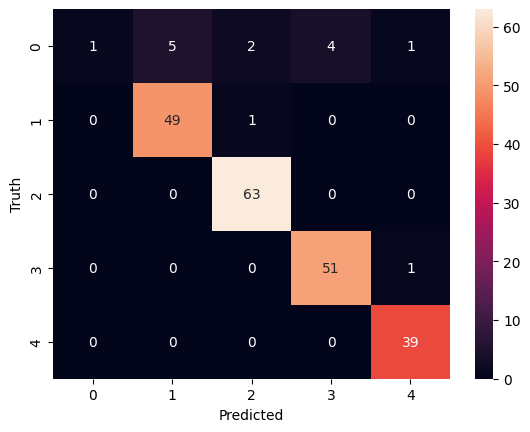

In [93]:
cf_matrix = confusion_matrix(b_test, prediction)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Decision Tree Classifier

In [94]:
dt = DecisionTreeClassifier(random_state=42)

In [95]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [96]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [97]:
grid_search.fit(a_train, b_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [98]:
DT = grid_search.best_estimator_

In [99]:
grid_search.best_score_

0.9089861751152074

In [100]:
grid_search.best_estimator_.fit(a_train, b_train)
grid_search.best_estimator_.score(a_test, b_test)

0.9400921658986175

In [101]:
print(d.iloc[1080])

STATE             36.000000
DISTRICT          30.000000
CASES              0.012217
cluster            4.000000
cluster_dbscan     2.000000
Name: 1080, dtype: float64


In [102]:
grid_search.best_estimator_.predict([[36.000000, 30.000000]])[0]

2

In [103]:
pd.DataFrame(
    {
        'Actual' : b_test,
        'Predicted' : prediction
    }
).sample(10)

,Actual,Predicted
388,1,1
3,0,0
497,1,1
1076,2,2
584,2,2
1009,2,2
992,2,2
964,3,3
277,1,1
367,0,0


Text(50.722222222222214, 0.5, 'Truth')

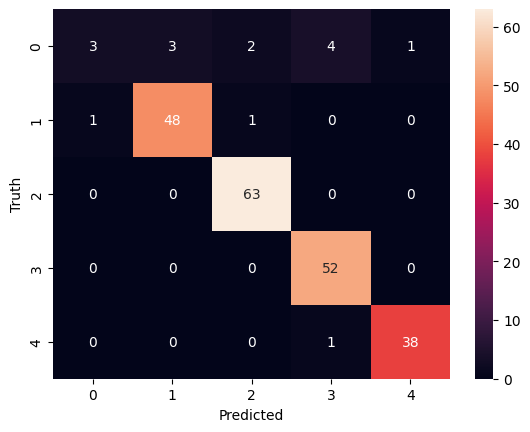

In [104]:
prediction = grid_search.best_estimator_.predict(a_test)
cf_matrix = confusion_matrix(b_test, prediction)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### SVM

In [105]:
clf = SVC() 
clf.fit(a_train, b_train)
clf.score(a_test, b_test)

0.9354838709677419

In [106]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(clf, param_distributions = param_distributions, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rnd_search_cv.fit(a_train, b_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   0.0s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   0.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   0.0s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   0.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   0.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   0.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   0.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   0.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   0.0s
[CV] END ....C=7.011150117432088, gamma=0.026070247583707663; total time=   0.0s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   0.0s
[CV] END ....C=7.011150117432088, gamma=0.0260

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17368cdc0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17368c910>},
                   random_state=42, verbose=2)

In [107]:
SVM = rnd_search_cv.best_estimator_

In [108]:
rnd_search_cv.best_estimator_.fit(a_train, b_train)
rnd_search_cv.best_estimator_.score(a_test, b_test)

0.9262672811059908

Text(50.722222222222214, 0.5, 'Truth')

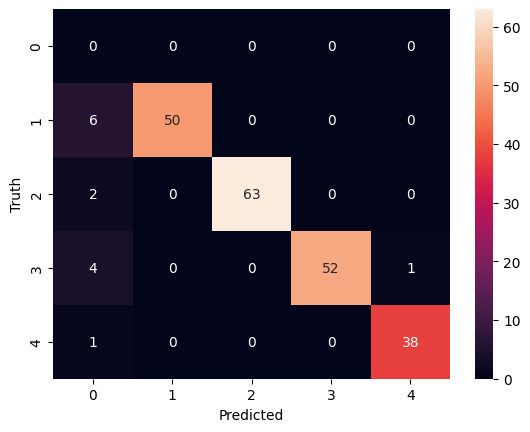

In [109]:
prediction = clf.predict(a_test)
cf_matrix = confusion_matrix(prediction, b_test)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## k-cross validation

In [110]:
cv = KFold(n_splits=10)
print("Decision Tree Classifier : " + str(cross_val_score(DT, a_train, b_train ,cv=cv).mean() * 100))
print("Random Forest Classifier : " + str(cross_val_score(RF, a_train, b_train ,cv=cv).mean() * 100))
print("KNN Classifier :           " + str(cross_val_score(KNN, a_train, b_train ,cv=cv).mean() * 100))
print("SVM Classifier :           " + str(cross_val_score(SVM, a_train, b_train ,cv=cv).mean() * 100))

Decision Tree Classifier : 90.66693397487302
Random Forest Classifier : 92.04624431970062
KNN Classifier :           91.70008019246193
SVM Classifier :           91.931301790965


Clearly, Random Forest Classifier outperforms all other models.
### **About Random Forest**

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
 


## Label and Scaled Data re-transformation

In [111]:
# d['STATE'] = le_state.inverse_transform(d[['STATE']])
# d['DISTRICT'] = le_dist.inverse_transform(d[['DISTRICT']])
# d.head()

# Saving the Model

In [112]:
# pickle.dump(RF, open("model.pkl", "wb"))

In [113]:
# model = pickle.load(open("model.pkl", "rb"))

In [114]:
d.iloc[234]

STATE             10.000000
DISTRICT           5.000000
CASES              0.000303
cluster            0.000000
cluster_dbscan     1.000000
Name: 234, dtype: float64

In [115]:
d.iloc[3]

STATE              0.000000
DISTRICT          24.000000
CASES              0.000396
cluster            3.000000
cluster_dbscan     0.000000
Name: 3, dtype: float64

In [116]:
# pred = model.predict([[10, 5]])
# pred

In [117]:
# pred = model.predict([[0, 24]])
# pred